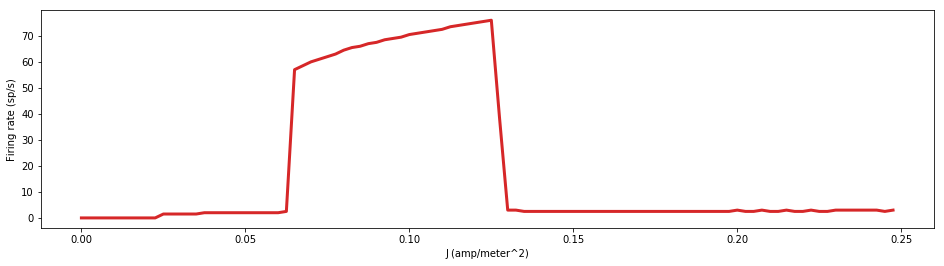

In [3]:
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

El = -54.4*mV
ENa = 50*mV
EK = -77*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

Cm=1*uF/cm**2

num_neurons = 100
duration = 2*second

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
dv/dt = (gl*(El-v) - gNa*(m*m*m)*h*(v-ENa) - gK*(n*n*n*n)*(v-EK) + I)/Cm : volt
I : amp/meter**2  # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (v+40*mV) / (1-(exp((-(v+40*mV)) / (10*mV))))/ms : Hz
betam = 4 * exp((-v-(65*mV))/(18*mV))/ms : Hz
alphah = 0.07 * exp((-v-(65*mV))/(20*mV))/ms : Hz
betah = 1/((exp((-v-35*mV) / (10*mV))) + 1)/ms : Hz
alphan = (0.01/mV) * (v+55*mV) / (1-(exp((-v-55*mV) / (10*mV))))/ms : Hz
betan = 0.125*exp((-v-(65*mV))/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = NeuronGroup(num_neurons, eqs,
                    threshold='v > 30*mV', reset = 'v=-65*mV',
                    method='euler', dt = 0.025*ms)

neuron.v = -65*mV
neuron.h = 0.6
neuron.m = 0.05
neuron.n = 0.32
neuron.I = '0.25*amp/meter**2 * i / num_neurons'
neuron.gNa = gNa0
M = StateMonitor(neuron, variables=True, record=True)

monitor = SpikeMonitor(neuron)
figure(figsize=(16, 4))

run(duration)

plot(neuron.I, monitor.count / duration, c='C3', lw=3)
xlabel('J (amp/meter^2)')
ylabel('Firing rate (sp/s)')
show()